In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [31]:
def gaussian_pdf(x, mu=0, sigma=1):
        u = (x - mu) / abs(sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
        return y * np.exp(-0.5 * u**2)

In [32]:
def uniform_pdf(x):
    return 1 * ((x >= 0) & (x <= 1))

In [33]:
def kernel_smoothed_density(x_values, samples, width=0.3, kernel_function=gaussian_pdf):
    # Generate an array of kernel values centred on the samples
    kernel_values = [kernel_function(x_value, samples, width) for x_value in x_values]
    return np.average(kernel_values, axis=1)

In [34]:
# General global variables
color1 = 'steelblue'
color2 = 'firebrick'
color3 = 'seagreen'
color4 = 'darkorange'

### Section 1: Uniform and normal random variables

In [35]:
X_gaussian = np.random.randn(10000)
X_uniform = np.random.rand(10000)

#### Histograms of random samples compared with true pdf

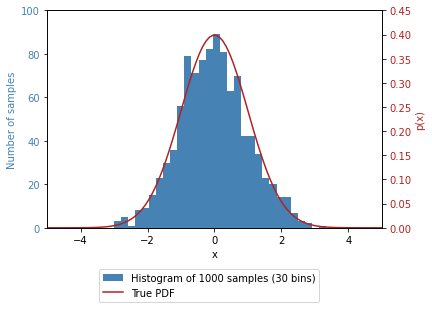

In [36]:
fig, ax1 = plt.subplots()

ax1.hist(X_gaussian[:1000], bins=30, color=color1, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()
x = np.linspace(-5, 5, 100)
ax2.plot(x, gaussian_pdf(x), color=color2, label='True PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/gaussian_histogram_and_pdf.png', bbox_inches='tight')

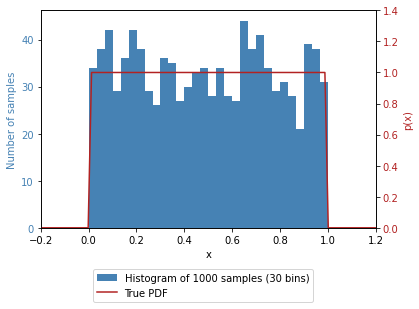

In [37]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.2, 1.2, 100)

ax1.hist(X_uniform[:1000], bins=30, color=color1, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=color2, label='True PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.4)
ax2.set_xlim(-0.2, 1.2)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/uniform_histogram_and_pdf.png', bbox_inches='tight')

#### Kernel smoothing

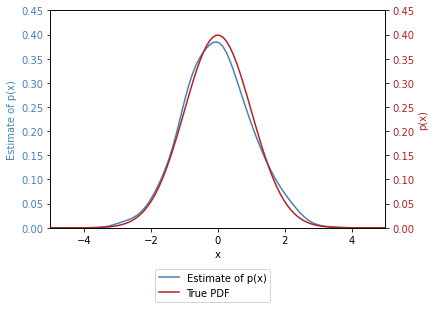

In [38]:
fig, ax1 = plt.subplots()

x = np.linspace(-5, 5, 100)

ax1.plot(x, kernel_smoothed_density(x, X_gaussian[:1000]), color=color1, label='Estimate of p(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Estimate of p(x)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 0.45)

ax2 = ax1.twinx()
ax2.plot(x, gaussian_pdf(x), color=color2, label='True PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/gaussian_kernel_smoothed.png', bbox_inches='tight')

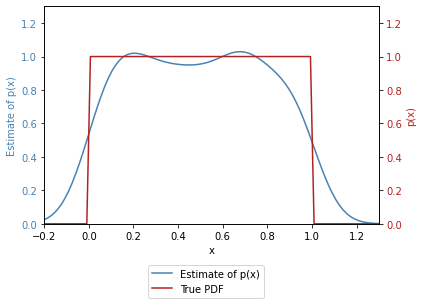

In [39]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.3, 1.3, 100)

ax1.plot(x, kernel_smoothed_density(x, X_uniform[:1000], width=0.1), color=color1, label='Estimate of p(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Estimate of p(x)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1.3)


ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=color2, label='True PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.3)
ax2.set_xlim(-0.2, 1.3)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/uniform_kernel_smoothed.png', bbox_inches='tight')

#### Multinomial theory: Uniform distribution

In [40]:
def plot_uniform_histogram_mean_sd(N, nbins=30):
    plt.figure()
    
    plt.hist(X_uniform[:N], bins=nbins, color=color1, label=f'Histogram of {N} samples ({nbins} bins)')

    bin_width = 1 / nbins
    mean = N * bin_width
    sd = np.sqrt(N * bin_width * (1 - bin_width))
    plt.hlines(y=mean, xmin=0, xmax=1, color=color2, label=r'$\mu$ (theoretical)')
    plt.hlines(y=[mean + 3 * sd, max(0, mean - 3 * sd)], xmin=0, xmax=1, color=color3, label='$\pm 3 \sigma$ (theoretical)')
    
    plt.xlabel('x')
    plt.ylabel('Number of samples')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    plt.savefig(f'figures/uniform_histogram_{N}.png', bbox_inches='tight')

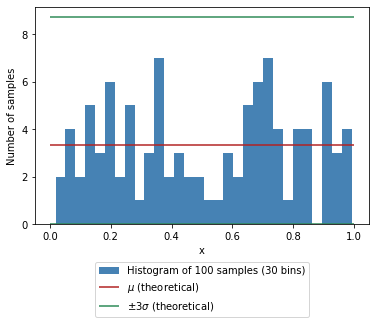

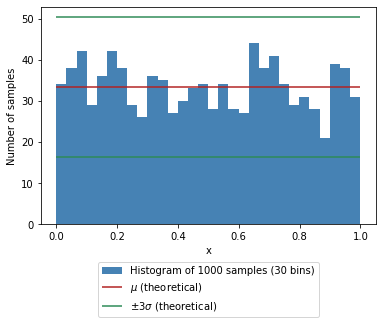

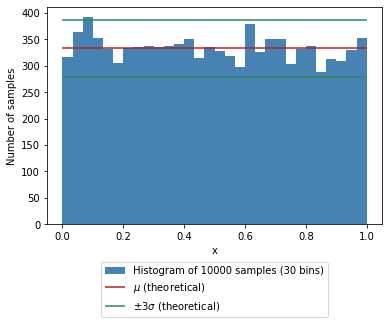

In [41]:
plot_uniform_histogram_mean_sd(100)
plot_uniform_histogram_mean_sd(1000)
plot_uniform_histogram_mean_sd(10000)

#### Multinomial theory: Gaussian distribution

In [42]:
def plot_gaussian_histogram_mean_sd(N, nbins=30):
    plt.figure()
    
    bin_counts, bin_edges, patches = plt.hist(X_gaussian[:N], bins=nbins,
                                              color=color1, label=f'Histogram of {N} samples ({nbins} bins)')
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_probabilities = norm.cdf(bin_edges[1:]) - norm.cdf(bin_edges[:-1])

    bin_means = N * bin_probabilities
    bin_sds = np.sqrt(N * bin_probabilities * (1 - bin_probabilities))
    upper_errorbar = 3 * bin_sds
    lower_errorbar = upper_errorbar
    lower_errorbar = np.minimum(3*bin_sds, bin_means)
    plt.errorbar(x=bin_centres, y=bin_means,
                 yerr=[lower_errorbar, upper_errorbar],
                 color=color2, fmt='o', capsize=2,
                 label=r'$\mu \pm 3\sigma$ (theoretical)')
    
    plt.xlim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('Number of samples')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    plt.savefig(f'figures/gaussian_histogram_{N}.png', bbox_inches='tight')

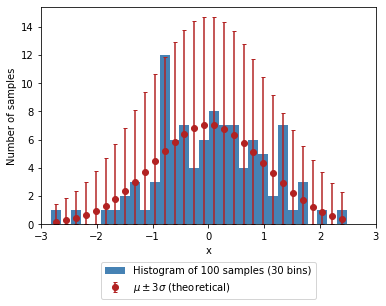

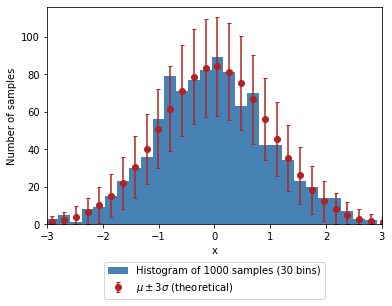

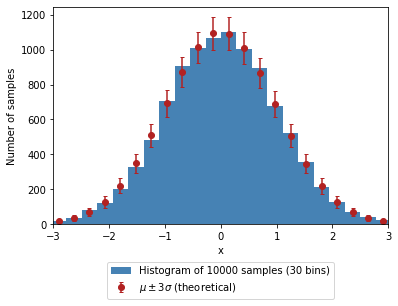

In [43]:
plot_gaussian_histogram_mean_sd(100)
plot_gaussian_histogram_mean_sd(1000)
plot_gaussian_histogram_mean_sd(10000)

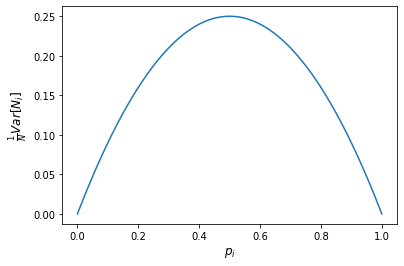

In [44]:
plt.figure()
x = np.linspace(0, 1, 1000)
plt.plot(x, x*(1 - x))
plt.xlabel(r'$p_i$', fontsize=12)
plt.ylabel(r'$\frac{1}{N}Var[N_i]$', fontsize=12)
plt.savefig(f'figures/histogram_variance.png', bbox_inches='tight')

### Section 2: Functions of Random Variables

#### f(x) = ax + b

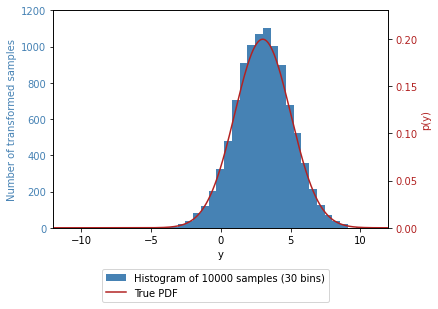

In [45]:
fig, ax1 = plt.subplots()

Y = 2 * X_gaussian[:10000] + 3
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1200)


ax2 = ax1.twinx()
x = np.linspace(-12, 12, 1000)
ax2.plot(x, gaussian_pdf(x, mu=3, sigma=2), color=color2, label='True PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.23)
ax2.set_xlim(-12, 12)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/linear_function_of_gaussian.png', bbox_inches='tight')

### f(x) = x^2

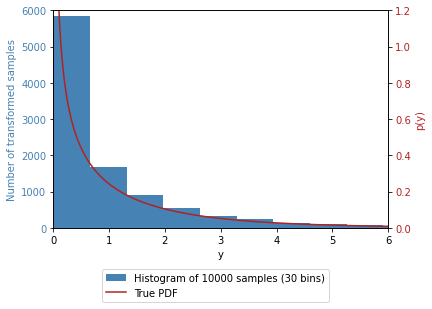

In [46]:
fig, ax1 = plt.subplots()

Y = X_gaussian[:10000] ** 2
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 6000)


ax2 = ax1.twinx()
x = np.linspace(0.01, 12, 1000)
pdf = np.exp(-0.5*x) / np.sqrt(2*np.pi*x)
ax2.plot(x, pdf, color=color2, label='True PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.2)
ax2.set_xlim(0, 6)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/quadratic_function_of_gaussian.png', bbox_inches='tight')

### f(x) = sin(x)

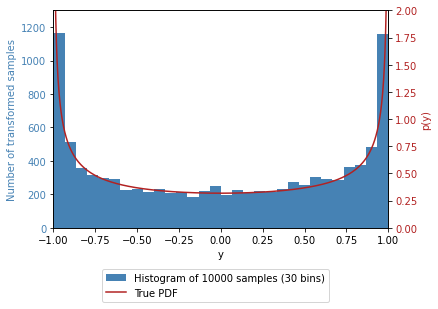

In [47]:
fig, ax1 = plt.subplots()

Y = np.sin(X_uniform[:10000]*2*np.pi)
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1300)


ax2 = ax1.twinx()
y = np.linspace(-0.99, 0.99, 1000)
pdf = 1 / (np.pi * np.sqrt(1 - y**2))
ax2.plot(y, pdf, color=color2, label='True PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 2)
ax2.set_xlim(-1, 1)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/sinusoidal_function_of_uniform.png', bbox_inches='tight')

### f(x) = limited(sin(x))

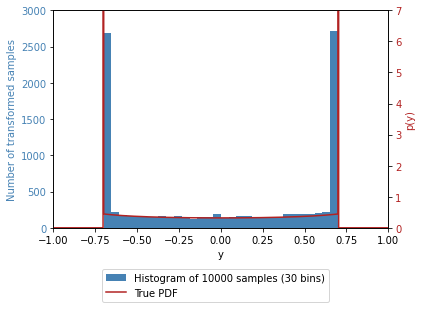

In [48]:
fig, ax1 = plt.subplots()

Y = np.clip(np.sin(X_uniform[:10000]*2*np.pi), -0.7, 0.7)
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 3000)


ax2 = ax1.twinx()
y = np.linspace(-1, 1, 1000)

def pdf(y):
    return 1 / (np.pi * np.sqrt(1 - y**2))

ax2.plot(y,
         np.piecewise(y,
                      [np.abs(y) > 0.7,
                       np.abs(np.abs(y) - 0.7) < 0.002,
                       np.abs(y) < 0.7],
                      [0,
                       9e99,
                       pdf]),
         color=color2, label='True PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 7)
ax2.set_xlim(-1, 1)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/limited_sinusoidal_function_of_uniform.png', bbox_inches='tight')

### Section 3: iCDF method

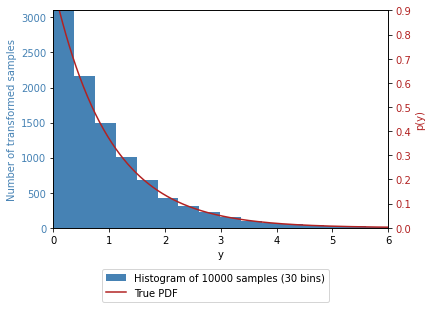

In [49]:
fig, ax1 = plt.subplots()

Y = -np.log(1 - X_uniform)

ax1.hist(Y, bins=30, color=color1, label=f'Histogram of {len(Y)} samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 3100)


ax2 = ax1.twinx()
x = np.linspace(0.01, 12, 1000)
pdf = np.exp(-x)
ax2.plot(x, pdf, color=color2, label='True PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.9)
ax2.set_xlim(0, 6)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/icdf_exponential.png', bbox_inches='tight')

Mean: 0.9957240079440213
Variance: 1.0727498248869258


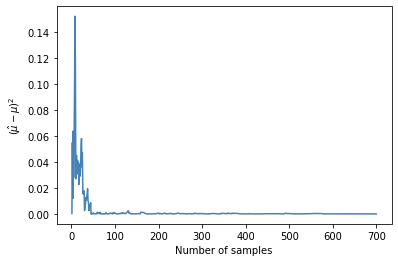

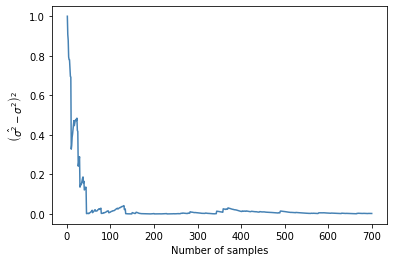

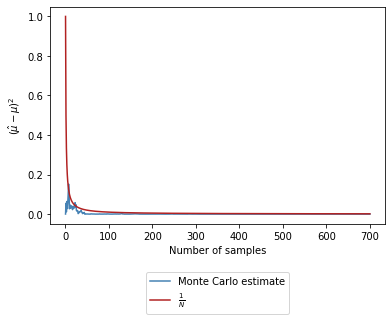

In [50]:
def estimate_mean(N):
    return np.mean(Y[:N])

def estimate_variance(N):
    return np.mean(Y[:N] * Y[:N]) - estimate_mean(N)**2

print(f"Mean: {estimate_mean(10000)}")
print(f"Variance: {estimate_variance(10000)}")

x = np.linspace(1, 700, 700)

plt.figure()
plt.plot(x, [(estimate_mean(int(n)) - 1)**2 for n in x], color=color1)
# plt.plot(x, 1/x)
plt.xlabel("Number of samples")
plt.ylabel(r'$(\hat{\mu} - \mu)^2$')
plt.savefig("figures/monte_carlo_mean.png")
    
plt.figure()
plt.plot(x, [(estimate_variance(int(n)) - 1)**2 for n in x], color=color1)
plt.xlabel("Number of samples")
plt.ylabel(r'$\left(\hat{\sigma^2} - \sigma^2\right)^2$')
plt.savefig("figures/monte_carlo_variance.png")

plt.figure()
plt.plot(x, [(estimate_mean(int(n)) - 1)**2 for n in x], color=color1, label='Monte Carlo estimate')
plt.plot(x, 1/x, color=color2, label=r'$\frac{1}{N}$')
plt.xlabel("Number of samples")
plt.ylabel(r'$(\hat{\mu} - \mu)^2$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.savefig("figures/monte_carlo_mean_best_fit.png")

### Section 4: Scaled mixture of Gaussians

#### Exponential sampling

In [51]:
def exponential_sampled_gaussian(N, alpha=1.5):
    exponential_samples = (-2 / (alpha ** 2)) * np.log(1 - X_uniform[:N])
    return X_gaussian[:N] * exponential_samples

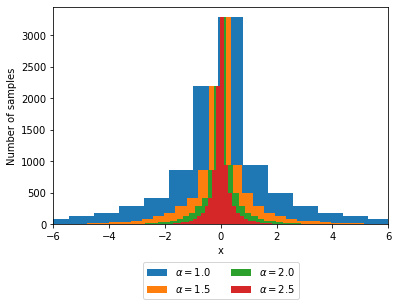

In [52]:
plt.figure()
N = 100000
for i in np.arange(0, 4):
    alpha = (i/2) + 1
    plt.hist(exponential_sampled_gaussian(N, alpha), bins=100, label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Number of samples')
plt.xlim(-6, 6)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig(f'figures/exponential_sampled_gaussian.png', bbox_inches='tight')

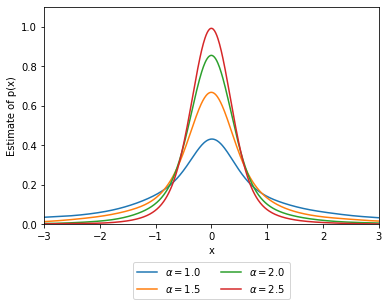

In [53]:
plt.figure()

N = 100000
x = np.linspace(-5, 5, 1000)

for i in np.arange(0, 4):
    alpha = i/2 + 1
    plt.plot(x, kernel_smoothed_density(x, exponential_sampled_gaussian(N, alpha)), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Estimate of p(x)')
plt.xlim(-3, 3)
plt.ylim(0, 1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig(f'figures/exponential_sampled_gaussian_ksdensity.png', bbox_inches='tight')

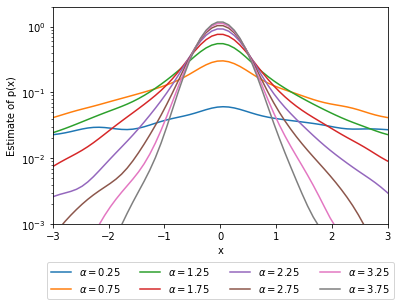

In [54]:
plt.figure()

N = 100000
x = np.linspace(-5, 5, 100)

for i in np.arange(0, 8):
    alpha = i/2 + 0.25
    plt.semilogy(x, kernel_smoothed_density(x, exponential_sampled_gaussian(N, alpha)), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Estimate of p(x)')
plt.xlim(-3, 3)
plt.ylim(1e-3, 2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.savefig(f'figures/exponential_sampled_gaussian_ksdensity_log_close.png', bbox_inches='tight')

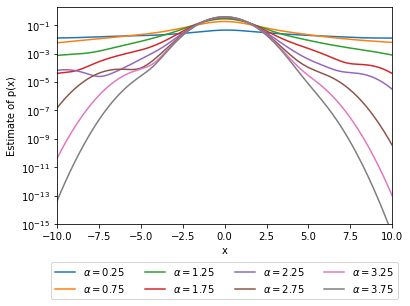

In [55]:
plt.figure()

N = 100000
x = np.linspace(-50, 50, 1000)

for i in np.arange(0, 8):
    alpha = i/2 + 0.25
    plt.semilogy(x, kernel_smoothed_density(x, exponential_sampled_gaussian(N, alpha), width=1), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Estimate of p(x)')
plt.xlim(-10, 10)
plt.ylim(1e-15, 2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.savefig(f'figures/nexponential_sampled_gaussian_ksdensity_log_far.png', bbox_inches='tight')

#### Gamma sampling

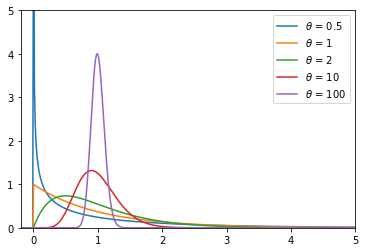

In [56]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

x = np.linspace(-1, 12, 1000)

plt.figure()
for t in [0.5,1,2,10,100]:
    plt.plot(x, stats.gamma.pdf(x, t, scale=1/t), label=r'$\theta$ = {}'.format(t))
plt.xlim(-0.2,5)
plt.ylim(0,5)
plt.legend()
plt.savefig(f'figures/gamma_theta.png', bbox_inches='tight')

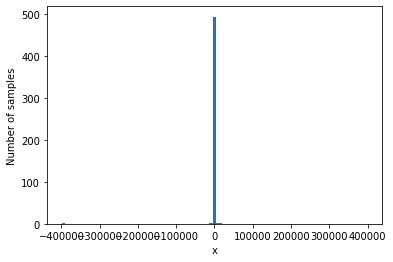

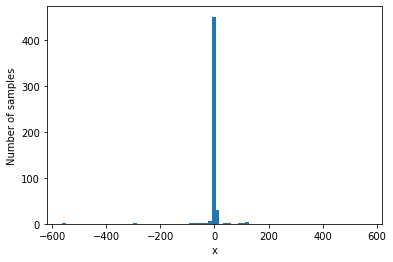

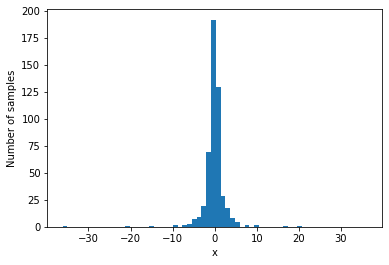

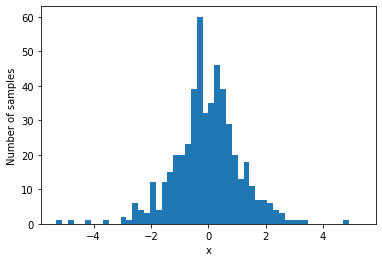

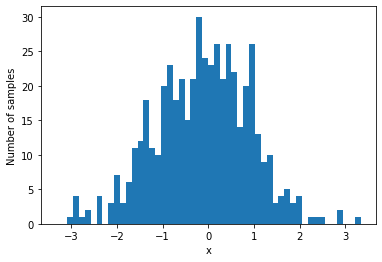

In [57]:
def gamma_sampled_gaussian(N, theta):
    v = stats.gamma.rvs(a=theta, scale=1/theta, size=N)
    u = 1 / v
    return np.random.normal(loc=0, scale=u)

N=500
nbins=50

samples = {theta: gamma_sampled_gaussian(N, theta) for theta in [0.5, 1, 2, 10, 100]}

for theta, s in samples.items():
    plt.figure()
    values, bins, patches = plt.hist(s, bins=nbins)
    xlim = 1.1*max(abs(min(bins)), abs(max(bins)))
    plt.xlim(-xlim, xlim)
    plt.xlabel('x')
    plt.ylabel('Number of samples')
    plt.savefig(f"figures/gamma_sampled_gaussian_histogram_{theta}.png")

/tmp/ipykernel_8052/1725639913.py:12: RuntimeWarning: overflow encountered in power
  ax2.semilogy(x, abs(x)**-(theta**2), color=color2)


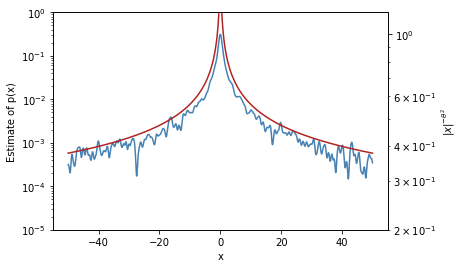

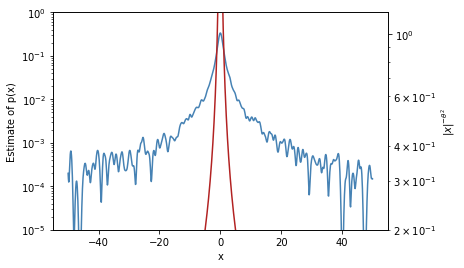

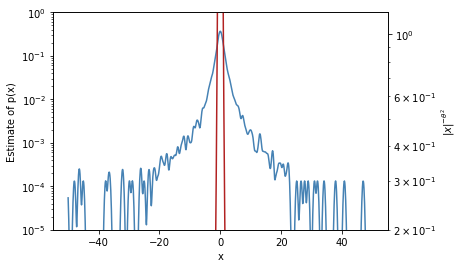

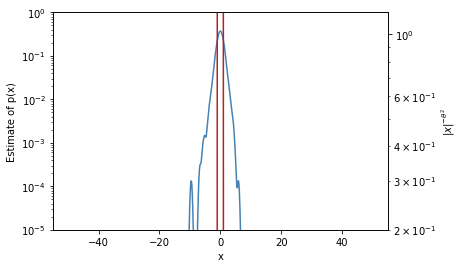

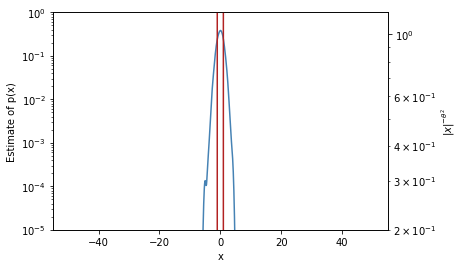

In [58]:
N = 10000
x = np.linspace(-50, 50, 1000)

for theta in [0.5, 1, 2, 10, 100]:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.semilogy(x,
                 kernel_smoothed_density(x,
                                         gamma_sampled_gaussian(N, theta)),
                 label=r'$\theta = {}$'.format(theta),
                 color=color1)
    ax2.semilogy(x, abs(x)**-(theta**2), color=color2)
    ax1.set_ylim(1e-5, 1)
    ax2.set_ylim(0.2, 1.2)
    ax1.set_xlabel('x')
    ax1.set_ylabel('Estimate of p(x)')
    ax2.set_ylabel(r'$|x|^{-\theta^2}$')
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    #plt.savefig(f'figures/gamma_sampled_gaussian_ksdensity.png', bbox_inches='tight')